In [41]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
housing=pd.read_csv("housing.csv")

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

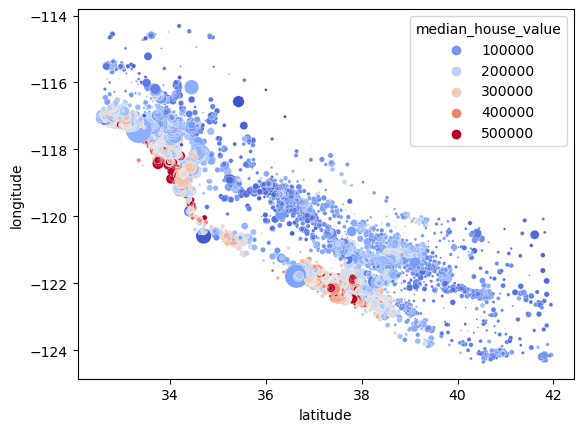

In [14]:
sb.scatterplot(x="latitude",y="longitude",hue="median_house_value",data=housing ,s=housing["population"]/100 ,palette="coolwarm")

In [15]:
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [16]:
housing_na=housing.dropna()


In [18]:
housing_na.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [20]:
dummies=pd.get_dummies(housing_na["ocean_proximity"],dtype=int)

In [21]:
housing_na.join(dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [22]:
housing_na=housing_na.drop(["ocean_proximity"],axis=1)

In [23]:
housing_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

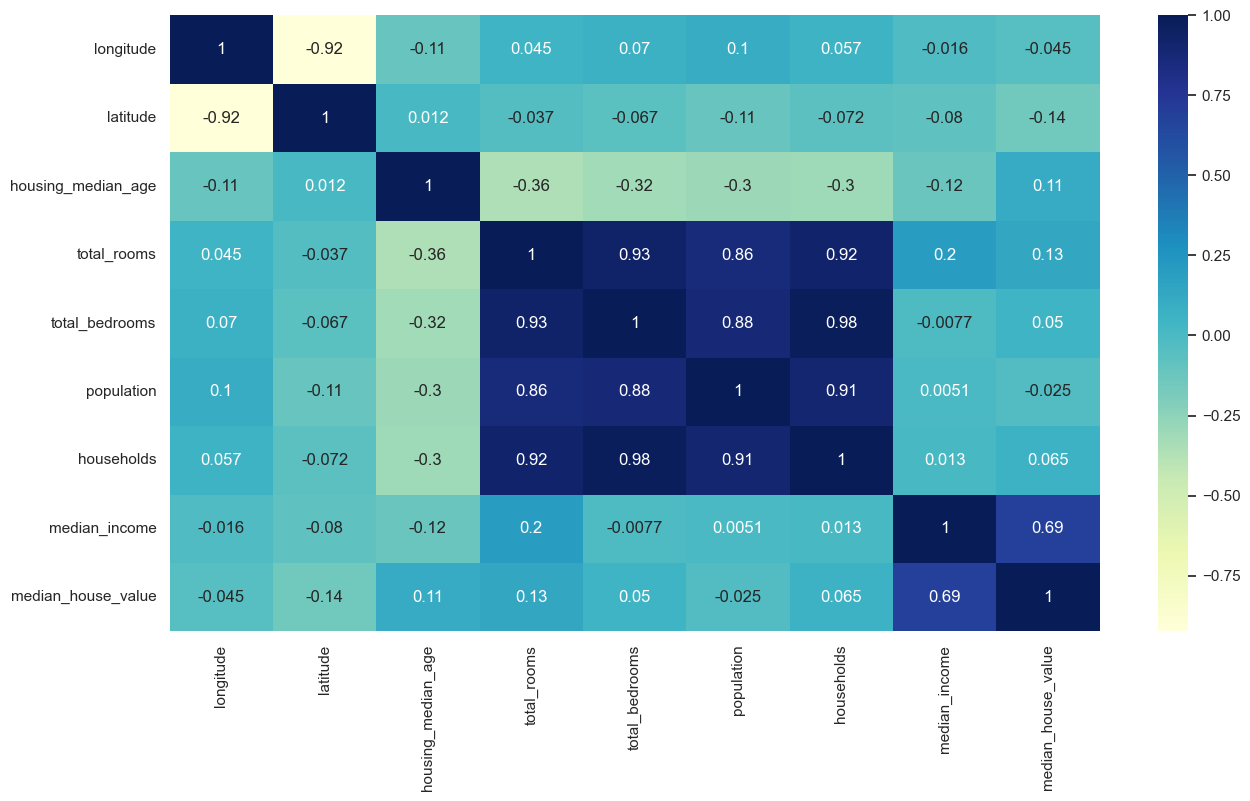

In [26]:
sb.set(rc={"figure.figsize":(15,8)})
sb.heatmap(housing_na.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='median_house_value', ylabel='median_income'>

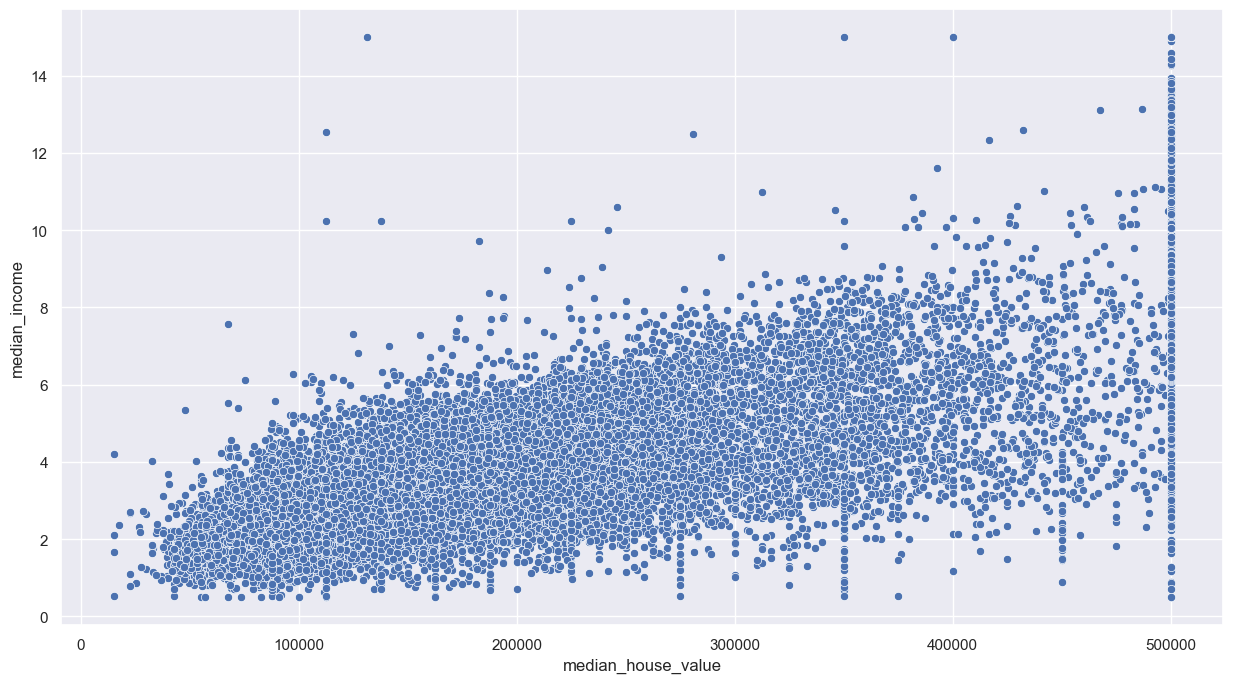

In [27]:
sb.scatterplot(x=housing_na["median_house_value"],y=housing_na["median_income"])

In [31]:
#Separacion de datos
x=housing_na.drop(["median_house_value"],axis=1)
y=housing_na["median_house_value"]


In [32]:
X_ent, X_pru, y_ent, y_pru=train_test_split(x,y,test_size=0.2)
print()

In [33]:
modelo=LinearRegression()
modelo.fit(X_ent,y_ent)

LinearRegression()

In [35]:
predictions=modelo.predict(X_pru)

In [36]:
predictions

array([114447.10771414, 116803.73669058, 181044.05783535, ...,
       211064.90162697, 215406.97958302, 155447.98350631])

In [40]:
comparativa={"predictions":predictions,"valor Real":y_pru}
pd.DataFrame(comparativa)

,predictions,valor Real
11792,114447.107714,151900.0
2552,116803.736691,81300.0
3032,181044.057835,96900.0
12077,287222.699865,257900.0
13178,219198.148337,206700.0
...,...,...
1348,232582.564587,160800.0
9199,70838.943003,124100.0
3615,211064.901627,165100.0
6098,215406.979583,192200.0


In [42]:
print(modelo.score(X_pru,y_pru))

0.6383795749056755


In [43]:
mse=mean_squared_error(y_pru,predictions)
rmse=np.sqrt(mse)
print(rmse)

69616.67615997928
